In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data.csv")
data.drop(["QaA", "QaE", "QdA", "QdE", "QgA", "QgE", "QiA", "QiE", "QlA", "QlE", "QnA", "QnE", "QpA", "QpE", "QtA", "QtE"], axis=1, inplace=True)
data.age_group=data.age_group.apply(lambda x:'+50s'if x in ['50s','60s','+70s'] else x)
data.head()

,index,QbA,QbE,QcA,QcE,QeA,QeE,QfA,QfE,QhA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,4.0,1370,5.0,997,2.0,1577,5.0,539,4.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,1313,3.0,3387,1.0,4320,3.0,2190,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,1.0,1480,1.0,1021,5.0,1333,1.0,531,1.0,...,1,1,0,1,1,1,1,0,1,1
3,3,3.0,2311,4.0,992,1.0,357,2.0,1519,3.0,...,0,0,0,0,1,0,1,0,1,1
4,4,1.0,707,5.0,556,1.0,1014,2.0,628,1.0,...,1,1,1,1,1,0,1,1,1,1


In [3]:
#tp 점수 변환
data['tp01']=7-data['tp01']
data['tp02']=7-data['tp02']
data['tp03']=7-data['tp03']
data['tp04']=7-data['tp04']
data['tp05']=7-data['tp05']
data['tp06']=7-data['tp06']
data['tp07']=7-data['tp07']
data['tp08']=7-data['tp08']
data['tp09']=7-data['tp09']
data['tp10']=7-data['tp10']

In [4]:
column_order = ['10s', '20s', '30s', '40s', '+50s']
data["age_group"] = data["age_group"].astype(pd.api.types.CategoricalDtype(categories=column_order))

# 연령대에 따른 데이터분석

# 1. QeA: 잘 속는 사람이 매분마다 태어난다고 말한 P.T. 바넘의 말은 틀렸다. (△)

In [ ]:
pivot1 = pd.pivot_table(data = data, index = "age_group", columns = "QeA", aggfunc = "size", fill_value = 0)
pivot1['Total'] = pivot1.sum(axis=1)
pivot1.loc['10s'] = pivot1.loc['10s']/pivot1['Total']['10s']
pivot1.loc['20s'] = pivot1.loc['20s']/pivot1['Total']['20s']
pivot1.loc['30s'] = pivot1.loc['30s']/pivot1['Total']['30s']
pivot1.loc['40s'] = pivot1.loc['40s']/pivot1['Total']['40s']
pivot1.loc['+50s'] = pivot1.loc['+50s']/pivot1['Total']['+50s']
pivot1 = pivot1.drop(['Total'], axis=1)
pivot1

QeA,1.0,2.0,3.0,4.0,5.0
age_group,,,,,
10s,0.363982,0.242912,0.197186,0.102919,0.093000
20s,0.392645,0.231576,0.170989,0.100907,0.103883
30s,0.425855,0.221542,0.135401,0.108984,0.108218
40s,0.407840,0.223124,0.119976,0.120768,0.128291
+50s,0.386522,0.202640,0.101436,0.144743,0.164660


Text(0.5, 1.0, 'QeA')

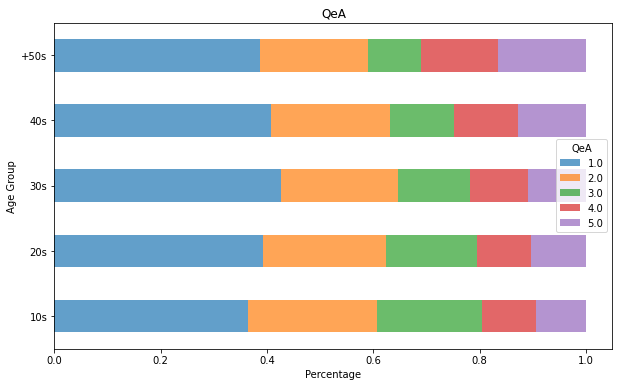

In [ ]:
pivot1.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.7)

plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.title('QeA')

In [ ]:
pivot2 = pd.pivot_table(data,values='QeA',index='age_group',aggfunc=np.mean)
pivot2

,QeA
age_group,
10s,2.318044
20s,2.291808
30s,2.252169
40s,2.338547
+50s,2.498379


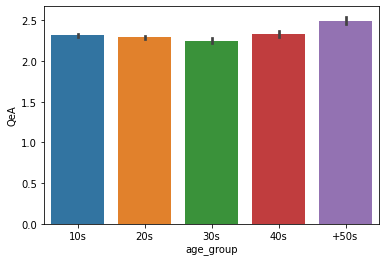

In [ ]:
sns.barplot(x='age_group',y='QeA',data=data,order=column_order)
plt.show()

*  모든 연령대에서 1.0, 즉 동의하지 않는 비율이 가장 높게 나타났다.
*  제일 동의하지 않은 연령대는 30대이며, 가장 많이 동의한 연령대는 50대 이상이었다.
*  **연령대에 따라 큰 차이가 나타나지는 않지만**, 응답의 평균들을 비교해본 결과, **연령대가 높아질수록 동의하는 비율이 약간 높아지는 것**을 알 수 있다.

## 2. Qf: 다른 사람에게 거짓말하는 것은 변명의 여지가 없다. (O)

In [ ]:
pivot1 = pd.pivot_table(data = data, index = "age_group", columns = "QfA", aggfunc = "size", fill_value = 0)
pivot1['Total'] = pivot1.sum(axis=1)
pivot1.loc['10s'] = pivot1.loc['10s']/pivot1['Total']['10s']
pivot1.loc['20s'] = pivot1.loc['20s']/pivot1['Total']['20s']
pivot1.loc['30s'] = pivot1.loc['30s']/pivot1['Total']['30s']
pivot1.loc['40s'] = pivot1.loc['40s']/pivot1['Total']['40s']
pivot1.loc['+50s'] = pivot1.loc['+50s']/pivot1['Total']['+50s']
pivot1 = pivot1.drop(['Total'], axis=1)
pivot1

QfA,1.0,2.0,3.0,4.0,5.0
age_group,,,,,
10s,0.486458,0.263384,0.084629,0.085614,0.079916
20s,0.446995,0.282384,0.082837,0.100057,0.087727
30s,0.411052,0.288668,0.086141,0.115620,0.098520
40s,0.353593,0.303108,0.070283,0.139378,0.133637
+50s,0.311950,0.294581,0.060445,0.158638,0.174386


Text(0.5, 1.0, 'QfA')

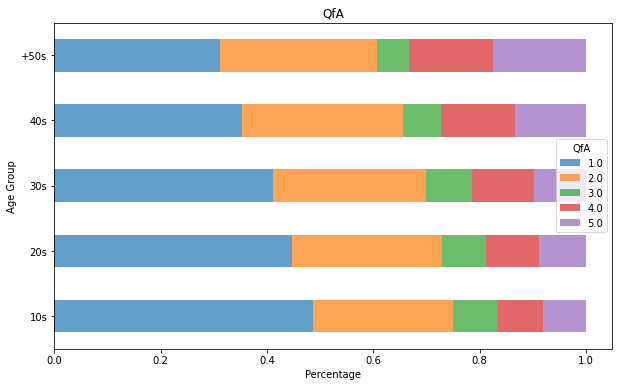

In [ ]:
pivot1.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.7)

plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.title('QfA')

In [ ]:
pivot2 = pd.pivot_table(data,values='QfA',index='age_group',aggfunc=np.mean)
pivot2

,QfA
age_group,
10s,2.009145
20s,2.099135
30s,2.201889
40s,2.396357
+50s,2.588930


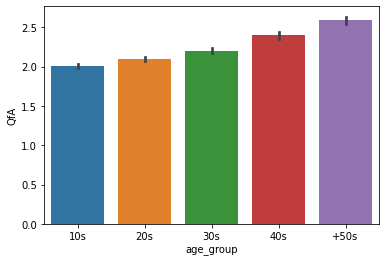

In [ ]:
sns.barplot(x='age_group',y='QfA',data=data,order=column_order)
plt.show()

*  동의하지 않는 비율이 10대가 가장 높고, 연령대가 높아짐에 따라서 비율이 줄어든다. 동의하는 비율은 반대로 10대일수록 가장 낮으며 50대 이상이 가장 높은 것으로 나타났다. 10대를 제외한 모든 연령대에서 가장 적게 나온 응답은 3.0으로, 중립적인 의견을 가지고 있는 비율이 가장 적다는 것을 알 수 있다.
*  응답의 평균을 비교해보아도 10대가 가장 동의하지 않는 의견에 가까운 것을 알 수 있고, 연령대가 높아짐에 따라 동의하는 응답에 가까워지는 것을 알 수 있다.
*  **연령대가 높아짐에 따라 다른 사람에게 거짓말하는 것은 변명의 여지가 없다는 것에 동의하는 비율이 높아진다**.

## 3. tp03: 신뢰할 수 있는 (O)

In [ ]:
pivot1 = pd.pivot_table(data = data, index = "age_group", columns = "tp03", aggfunc = "size", fill_value = 0)
pivot1['Total'] = pivot1.sum(axis=1)
pivot1.loc['10s'] = pivot1.loc['10s']/pivot1['Total']['10s']
pivot1.loc['20s'] = pivot1.loc['20s']/pivot1['Total']['20s']
pivot1.loc['30s'] = pivot1.loc['30s']/pivot1['Total']['30s']
pivot1.loc['40s'] = pivot1.loc['40s']/pivot1['Total']['40s']
pivot1.loc['+50s'] = pivot1.loc['+50s']/pivot1['Total']['+50s']
pivot1 = pivot1.drop(['Total'], axis=1)
pivot1 = pivot1.drop([0], axis=1)
pivot1

tp03,1,2,3,4,5,6,7
age_group,,,,,,,
10s,0.033415,0.062188,0.102427,0.088357,0.212241,0.274358,0.219346
20s,0.032951,0.062713,0.095592,0.083900,0.207554,0.283447,0.228316
30s,0.025906,0.050408,0.083971,0.071720,0.192956,0.311639,0.257785
40s,0.014651,0.041378,0.072857,0.055633,0.164522,0.336963,0.305088
+50s,0.016443,0.032886,0.051413,0.046318,0.113015,0.334414,0.385827


Text(0.5, 1.0, 'Dependable, Self-disciplined')

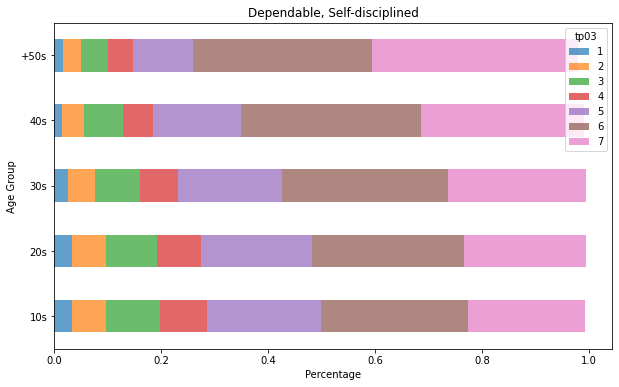

In [ ]:
pivot1.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.7)

plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.title('Dependable, Self-disciplined')

In [5]:
pivot2 = pd.pivot_table(data,values='tp03',index='age_group',aggfunc=np.mean)
pivot2

,tp03
age_group,
10s,5.061273
20s,5.117418
30s,5.304620
40s,5.518511
+50s,5.694071


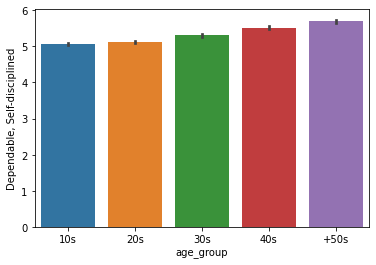

In [6]:
sns.barplot(x='age_group',y='tp03',data=data,order=column_order)
plt.ylabel('Dependable, Self-disciplined')
plt.show()

*  본인이 신뢰할 수 있는 성격이라고 답한 사람들의 비율은 10대가 가장 낮았고, 50대 이상이 가장 높았다. 즉, **연령대가 높아질수록 본인이 신뢰할 수 있는 성격의 소유자라고 생각하는 사람들이 많다**는 것을 알 수 있다.
*  흥미로운 점은, 응답 평균을 구해보았을 때 모든 연령대에서 5점대의 점수가 나왔다는 점이다. 대부분 본인이 신뢰할 수 있는 성격을 가졌다고 생각하였지만, 여기서도 연령대가 높을수록 더 동의하는 경향이 높다는 것을 알 수 있다.

## 3.1 환경적 영향


### 3.1.1. 교육수준 (O)

In [ ]:
pivot1 = pd.pivot_table(data = data, index = "education", columns = "tp03", aggfunc = "size", fill_value = 0)
pivot1['Total'] = pivot1.sum(axis=1)
pivot1.loc[0] = pivot1.loc[0]/pivot1['Total'][0]
pivot1.loc[1] = pivot1.loc[1]/pivot1['Total'][1]
pivot1.loc[2] = pivot1.loc[2]/pivot1['Total'][2]
pivot1.loc[3] = pivot1.loc[3]/pivot1['Total'][3]
pivot1.loc[4] = pivot1.loc[4]/pivot1['Total'][4]
pivot1 = pivot1.drop([0], axis=0)
pivot1 = pivot1.drop([0], axis=1)
pivot1 = pivot1.drop(['Total'], axis=1)
pivot1

tp03,1,2,3,4,5,6,7
education,,,,,,,
1,0.043632,0.063090,0.106132,0.090212,0.211871,0.269261,0.205975
2,0.032076,0.062667,0.100980,0.084407,0.204574,0.281437,0.225483
3,0.022723,0.052932,0.083076,0.070598,0.187759,0.309385,0.266369
4,0.020499,0.039725,0.065062,0.061879,0.165393,0.320601,0.320601


Text(0.5, 1.0, 'Dependable, Self-disciplined')

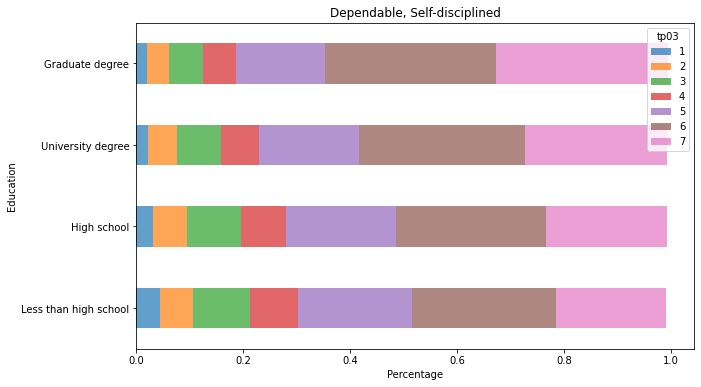

In [ ]:
pivot1.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.7)

plt.xlabel('Percentage')
plt.ylabel('Education')
plt.yticks([0,1,2,3],['Less than high school', 'High school', 'University degree', 'Graduate degree'])
plt.title('Dependable, Self-disciplined')

In [7]:
pivot2 = pd.pivot_table(data,values='tp03',index='education',aggfunc=np.mean)
pivot2 = pivot2.drop([0], axis=0)
pivot2

,tp03
education,
1,4.965802
2,5.087853
3,5.319892
4,5.537433


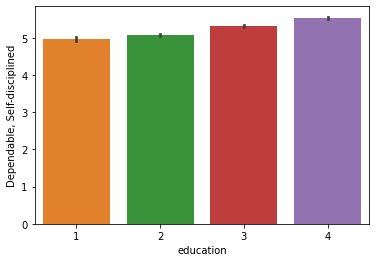

In [8]:
sns.barplot(x='education',y='tp03',data=data)
plt.xlim([0.5, 4.5]) 
plt.ylabel('Dependable, Self-disciplined')
plt.show()

*  교육수준에 따라 '신뢰할 수 있는' 성격에 차이가 나타났다. 
*  **교육수준이 높을수록 본인이 신뢰할 수 있는 성격의 소유자라는 것에 강력하게 동의하는 비율이 높은 것으로 나타났다.**

### 3.1.2. 형제 자매수 (△)

In [11]:
pivot1 = pd.pivot_table(data = data, index = "familysize", columns = "QeA", aggfunc = "size", fill_value = 0)
pivot1['Total'] = pivot1.sum(axis=1)
pivot1

QeA,1.0,2.0,3.0,4.0,5.0,Total
familysize,,,,,,
0,473,274,213,121,136,1217
1,2691,1445,1030,675,694,6535
2,7047,4158,2943,1895,1875,17918
3,4283,2676,1817,1257,1223,11256
4,1913,1103,762,565,564,4907
5,719,449,306,244,244,1962
6,317,182,122,108,109,838
7,150,75,52,53,57,387
8,76,41,43,29,32,221


In [12]:
data.familysize=data.familysize.apply(lambda x:'+10'if x >= 10 else x)

In [13]:
column_order2 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, '+10']
data["familysize"] = data["familysize"].astype(pd.api.types.CategoricalDtype(categories=column_order2))

In [14]:
data.familysize

0        4
1        3
2        3
3        0
4        2
        ..
45527    1
45528    2
45529    1
45530    2
45531    3
Name: familysize, Length: 45532, dtype: category
Categories (11, object): [0, 1, 2, 3, ..., 7, 8, 9, '+10']

In [15]:
pivot1 = pd.pivot_table(data = data, index = "familysize", columns = "tp03", aggfunc = "size", fill_value = 0)
pivot1['Total'] = pivot1.sum(axis=1)
pivot1.loc[0] = pivot1.loc[0]/pivot1['Total'][0]
pivot1.loc[1] = pivot1.loc[1]/pivot1['Total'][1]
pivot1.loc[2] = pivot1.loc[2]/pivot1['Total'][2]
pivot1.loc[3] = pivot1.loc[3]/pivot1['Total'][3]
pivot1.loc[4] = pivot1.loc[4]/pivot1['Total'][4]
pivot1.loc[5] = pivot1.loc[5]/pivot1['Total'][5]
pivot1.loc[6] = pivot1.loc[6]/pivot1['Total'][6]
pivot1.loc[7] = pivot1.loc[7]/pivot1['Total'][7]
pivot1.loc[8] = pivot1.loc[8]/pivot1['Total'][8]
pivot1.loc[9] = pivot1.loc[9]/pivot1['Total'][9]
pivot1.loc['+10'] = pivot1.loc['+10']/pivot1['Total']['+10']
pivot1 = pivot1.drop([0], axis=1)
pivot1 = pivot1.drop(['Total'], axis=1)
pivot1

tp03,1,2,3,4,5,6,7
familysize,,,,,,,
0,0.036976,0.059162,0.073952,0.092851,0.200493,0.257190,0.267872
1,0.031217,0.065493,0.100842,0.086917,0.202448,0.279265,0.226167
2,0.028240,0.056870,0.090747,0.079808,0.197176,0.294899,0.245563
3,0.028429,0.054193,0.086887,0.071073,0.187189,0.303038,0.261283
4,0.024455,0.048502,0.088037,0.069289,0.198900,0.299572,0.262075
5,0.020897,0.037717,0.077982,0.066259,0.161570,0.335372,0.291539
6,0.023866,0.038186,0.065632,0.058473,0.180191,0.304296,0.315036
7,0.038760,0.046512,0.062016,0.059432,0.165375,0.284238,0.330749
8,0.036199,0.054299,0.063348,0.054299,0.126697,0.321267,0.334842


Text(0.5, 1.0, 'Dependable, Self-disciplined')

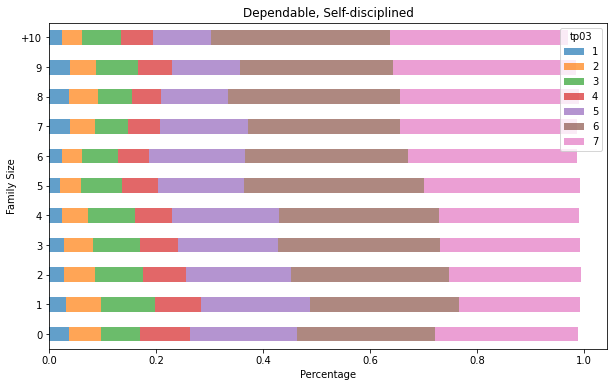

In [16]:
pivot1.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.7)

plt.xlabel('Percentage')
plt.ylabel('Family Size')
plt.title('Dependable, Self-disciplined')

In [17]:
pivot2 = pd.pivot_table(data,values='tp03',index='familysize',aggfunc=np.mean)
pivot2

,tp03
familysize,
0,5.169269
1,5.083397
2,5.207668
3,5.264925
4,5.289179
5,5.456167
6,5.463007
7,5.403101
8,5.457014


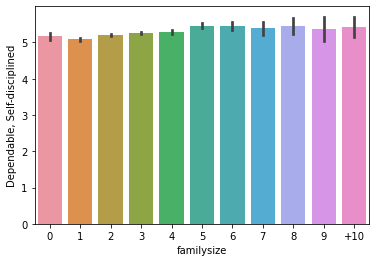

In [18]:
sns.barplot(x='familysize',y='tp03',data=data)
plt.xlim([-0.5, 10.5]) 
plt.ylabel('Dependable, Self-disciplined')
plt.show()

*  **비율 그래프로 봤을 때는 본인이 신뢰할 수 있는 성격이라는 것에 동의하는 비율이 형제자매 수가 많을수록 높아지**는 것 같아 보이고, **평균을 비교한 바 차트를 보아도 비슷한 결과**가 나타나지만, **유의미하지는 않은 결과**인 것 같다.

### 3.1.3. 결혼 유무 (O)

In [ ]:
pivot1 = pd.pivot_table(data = data, index = "married", columns = "tp03", aggfunc = "size", fill_value = 0)
pivot1['Total'] = pivot1.sum(axis=1)
pivot1.loc[1] = pivot1.loc[1]/pivot1['Total'][1]
pivot1.loc[2] = pivot1.loc[2]/pivot1['Total'][2]
pivot1.loc[3] = pivot1.loc[3]/pivot1['Total'][3]
pivot1 = pivot1.drop([0], axis=0)
pivot1 = pivot1.drop([0], axis=1)
pivot1 = pivot1.drop(['Total'], axis=1)
pivot1

tp03,1,2,3,4,5,6,7
married,,,,,,,
1,0.032805,0.062504,0.098542,0.086181,0.208177,0.282441,0.223074
2,0.015210,0.036286,0.067203,0.054777,0.159559,0.327766,0.329357
3,0.025849,0.043603,0.068930,0.054047,0.153525,0.326632,0.311227


Text(0.5, 1.0, 'Dependable, Self-disciplined')

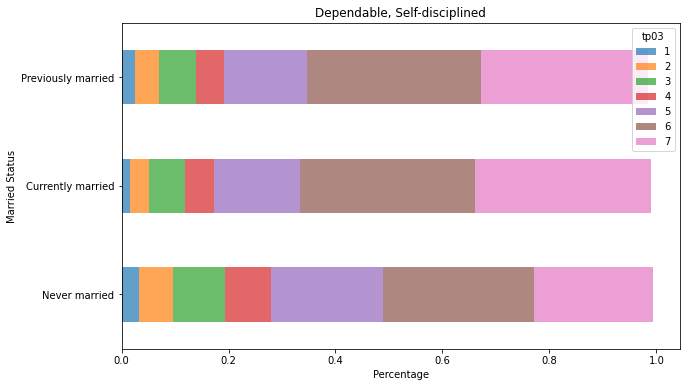

In [ ]:
pivot1.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.7)

plt.xlabel('Percentage')
plt.ylabel('Married Status')
plt.yticks([0,1,2],['Never married','Currently married','Previously married'])
plt.title('Dependable, Self-disciplined')

In [19]:
pivot2 = pd.pivot_table(data,values='tp03',index='married',aggfunc=np.mean)
pivot2 = pivot2.drop([0], axis=0)
pivot2

,tp03
married,
1,5.095214
2,5.578388
3,5.442037


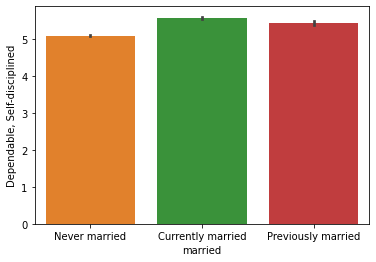

In [20]:
sns.barplot(x='married',y='tp03',data=data)
plt.xlim([0.5, 3.5]) 
plt.xticks([1,2,3],['Never married','Currently married','Previously married'])
plt.ylabel('Dependable, Self-disciplined')
plt.show()

*  **한 번이라도 결혼해 본 사람들이 결혼을 한번도 안 해본 사람에 비해 본인이 신뢰할 수 있는 성격의 소유자라는 것에 더 강력하게 동의하는 경향이 나타났다.**
*  현재 결혼한 상태인 사람들과 이혼한 상태인 사람들을 비교해보면, **현재 결혼한 상태의 사람들이 이혼한 상태의 사람들에 비해 본인이 신뢰할 수 있는 성격이라는 것에 동의하는 비율이 약간 더 높았다.**

### 3.1.4. 유년기 거주지역 (X)

In [ ]:
pivot1 = pd.pivot_table(data = data, index = "urban", columns = "tp03", aggfunc = "size", fill_value = 0)
pivot1['Total'] = pivot1.sum(axis=1)
pivot1.loc[1] = pivot1.loc[1]/pivot1['Total'][1]
pivot1.loc[2] = pivot1.loc[2]/pivot1['Total'][2]
pivot1.loc[3] = pivot1.loc[3]/pivot1['Total'][3]
pivot1 = pivot1.drop([0], axis=0)
pivot1 = pivot1.drop([0], axis=1)
pivot1 = pivot1.drop(['Total'], axis=1)
pivot1

tp03,1,2,3,4,5,6,7
urban,,,,,,,
1,0.027051,0.048378,0.084970,0.072511,0.180155,0.307442,0.269952
2,0.027679,0.057408,0.094367,0.075213,0.196450,0.297507,0.245009
3,0.029549,0.056509,0.084820,0.079811,0.195306,0.289638,0.255699


Text(0.5, 1.0, 'Dependable, Self-disciplined')

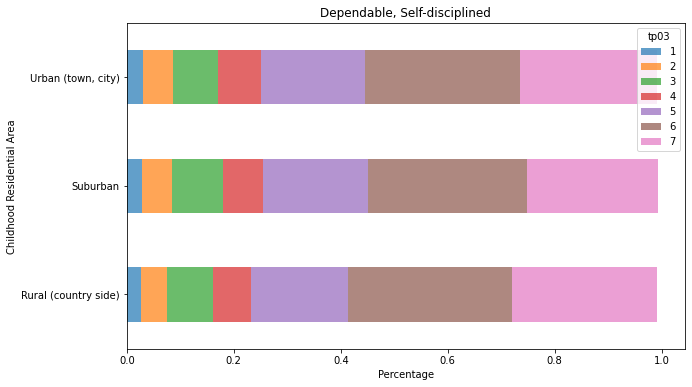

In [ ]:
pivot1.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.7)

plt.xlabel('Percentage')
plt.ylabel('Childhood Residential Area')
plt.yticks([0,1,2],['Rural (country side)', 'Suburban', 'Urban (town, city)'])
plt.title('Dependable, Self-disciplined')

In [21]:
pivot2 = pd.pivot_table(data,values='tp03',index='urban',aggfunc=np.mean)
pivot2 = pivot2.drop([0], axis=0)
pivot2

,tp03
urban,
1,5.303850
2,5.208805
3,5.220521


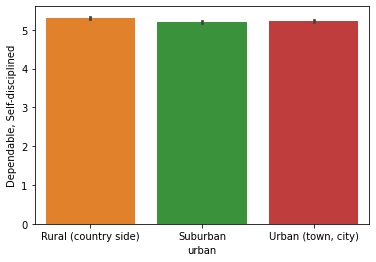

In [22]:
sns.barplot(x='urban',y='tp03',data=data)
plt.xlim([0.5, 3.5]) 
plt.xticks([1,2,3],['Rural (country side)', 'Suburban', 'Urban (town, city)'])
plt.ylabel('Dependable, Self-disciplined')
plt.show()

*  유년기 거주 지역은 비율 그래프를 봐도, 평균을 비교해보아도 모두 큰 차이가 나타나지 않는다.
*  따라서, **유년기 거주 지역이 신뢰할 수 있는 성격인지 여부에 영향을 미치지 않는다고 볼 수 있다.**

### 3.1.5. 모국어가 영어 (△)

In [ ]:
pivot1 = pd.pivot_table(data = data, index = "engnat", columns = "tp03", aggfunc = "size", fill_value = 0)
pivot1['Total'] = pivot1.sum(axis=1)
pivot1.loc[1] = pivot1.loc[1]/pivot1['Total'][1]
pivot1.loc[2] = pivot1.loc[2]/pivot1['Total'][2]
pivot1 = pivot1.drop([0], axis=0)
pivot1 = pivot1.drop([0], axis=1)
pivot1 = pivot1.drop(['Total'], axis=1)
pivot1

tp03,1,2,3,4,5,6,7
engnat,,,,,,,
1,0.025890,0.051387,0.086816,0.069889,0.189347,0.302992,0.266261
2,0.034591,0.065401,0.094924,0.093637,0.202317,0.278578,0.221382


Text(0.5, 1.0, 'Dependable, Self-disciplined')

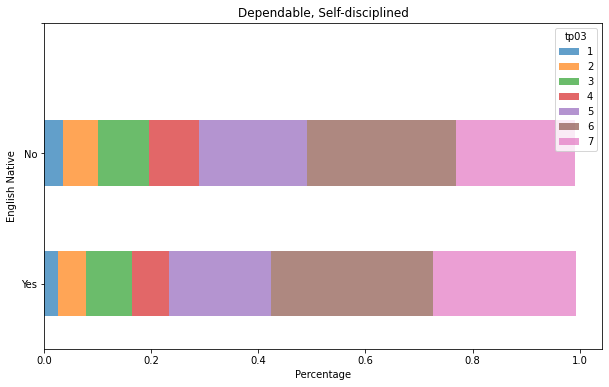

In [ ]:
pivot1.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.7)

plt.xlabel('Percentage')
plt.ylabel('English Native')
plt.yticks([0,1],['Yes', 'No'])
plt.title('Dependable, Self-disciplined')

In [ ]:
pivot2 = pd.pivot_table(data,values='tp03',index='engnat',aggfunc=np.mean)
pivot2 = pivot2.drop([0], axis=0)
pivot2

,tp03
engnat,
1,5.297178
2,5.057437


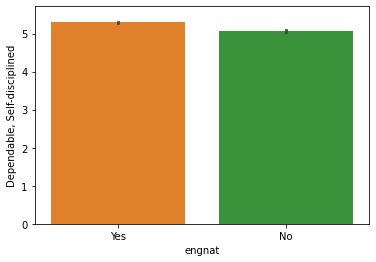

In [ ]:
sns.barplot(x='engnat',y='tp03',data=data)
plt.xlim([0.5, 2.5]) 
plt.xticks([1,2],['Yes', 'No'])
plt.ylabel('Dependable, Self-disciplined')
plt.show()

*  비율 그래프와 평균을 분석해보았을 때, **영어가 모국어인 사람들이 그렇지 않은 사람들에 비해 본인이 신뢰할 수 있는 성격이라는 것에 동의하는 비율이 아주 살짝 높은 것으로 나타났다.**
*  **하지만** 평균이 0.2점 밖에 차이나지 않는 것으로 보아, **유의미한 차이인지는 확실하지 않다.**

## 3.2 유전적 영향

### 3.2.1. 성별 (X)

In [ ]:
pivot1 = pd.pivot_table(data = data, index = "gender", columns = "tp03", aggfunc = "size", fill_value = 0)
pivot1['Total'] = pivot1.sum(axis=1)
pivot1.loc['Male'] = pivot1.loc['Male']/pivot1['Total']['Male']
pivot1.loc['Female'] = pivot1.loc['Female']/pivot1['Total']['Female']
pivot1 = pivot1.drop([0], axis=1)
pivot1 = pivot1.drop(['Total'], axis=1)
pivot1

tp03,1,2,3,4,5,6,7
gender,,,,,,,
Female,0.027023,0.050246,0.088107,0.070983,0.190195,0.308703,0.257471
Male,0.029401,0.059628,0.089813,0.081348,0.195028,0.285254,0.251022


Text(0.5, 1.0, 'Dependable, Self-disciplined')

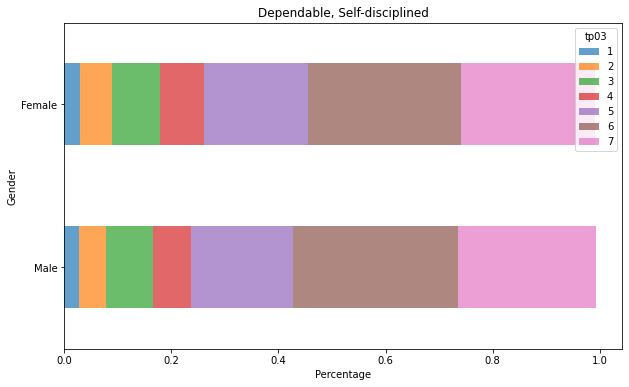

In [ ]:
pivot1.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.7)

plt.xlabel('Percentage')
plt.ylabel('Gender')
plt.yticks([0,1],['Male', 'Female'])
plt.title('Dependable, Self-disciplined')

In [ ]:
pivot2 = pd.pivot_table(data,values='tp03',index='gender',aggfunc=np.mean)
pivot2

,tp03
gender,
Female,5.281257
Male,5.187306


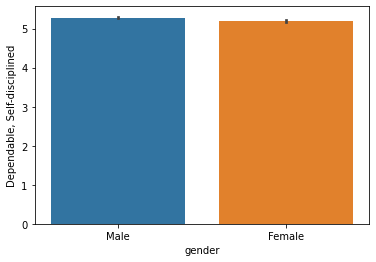

In [ ]:
sns.barplot(x='gender',y='tp03',data=data)
plt.xlim([-0.5, 1.5]) 
plt.xticks([0,1],['Male', 'Female'])
plt.ylabel('Dependable, Self-disciplined')
plt.show()

*  유전적인 영향인 성별에 따라서는 아무 차이가 나타나지 않았다.
*  따라서, **신뢰할 수 있는 성격인지의 여부는 성별 (유전적 영향)의 영향을 받지 않는 것으로 나타났다.**

### 3.2.2. 필기하는 손 (△)

In [ ]:
pivot1 = pd.pivot_table(data = data, index = "hand", columns = "tp03", aggfunc = "size", fill_value = 0)
pivot1['Total'] = pivot1.sum(axis=1)
pivot1.loc[1] = pivot1.loc[1]/pivot1['Total'][1]
pivot1.loc[2] = pivot1.loc[2]/pivot1['Total'][2]
pivot1.loc[3] = pivot1.loc[3]/pivot1['Total'][3]
pivot1 = pivot1.drop([0], axis=0)
pivot1 = pivot1.drop([0], axis=1)
pivot1 = pivot1.drop(['Total'], axis=1)
pivot1

tp03,1,2,3,4,5,6,7
hand,,,,,,,
1,0.028240,0.055917,0.088868,0.075631,0.194096,0.297353,0.251805
2,0.027920,0.051790,0.097613,0.083120,0.191816,0.299020,0.242114
3,0.032079,0.046885,0.067859,0.075262,0.161012,0.266502,0.342381


Text(0.5, 1.0, 'Dependable, Self-disciplined')

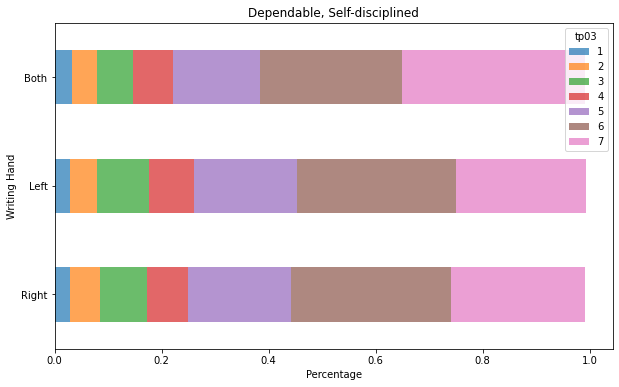

In [ ]:
pivot1.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.7)

plt.xlabel('Percentage')
plt.ylabel('Writing Hand')
plt.yticks([0,1,2],['Right', 'Left', 'Both'])
plt.title('Dependable, Self-disciplined')

In [ ]:
pivot2 = pd.pivot_table(data,values='tp03',index='hand',aggfunc=np.mean)
pivot2 = pivot2.drop([0], axis=0)
pivot2

,tp03
hand,
1,5.226432
2,5.204817
3,5.431215


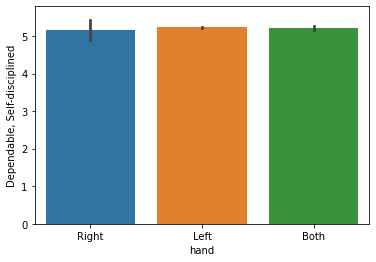

In [ ]:
sns.barplot(x='hand',y='tp03',data=data)
plt.xlim([-0.5, 2.5]) 
plt.xticks([0,1,2],['Right', 'Left', 'Both'])
plt.ylabel('Dependable, Self-disciplined')
plt.show()

*  필기하는 손을 분석해보았을 때, **비율 그래프에서는 양손 모두 쓰는 사람들이 신뢰할 수 있는 성격이라는 것에 동의할 확률이 더 높은 것**으로 나타났다. 
*  **평균을 비교해보면, 오른손 혹은 왼손만을 쓰는 사람들의 평균은 거의 동일하게 나타났지만, 양손을 모두 쓰는 사람들은 약 0.2점 정도 평균이 높았다.**
*  하지만 0.2점은 아주 작은 차이이기 때문에 **유의미한 차이라고 보기 힘들 것 같다.**

##4. tp04: 불안해하는, 쉽게 속상하게 만드는

In [ ]:
pivot1 = pd.pivot_table(data = data, index = "age_group", columns = "tp04", aggfunc = "size", fill_value = 0)
pivot1['Total'] = pivot1.sum(axis=1)
pivot1.loc['10s'] = pivot1.loc['10s']/pivot1['Total']['10s']
pivot1.loc['20s'] = pivot1.loc['20s']/pivot1['Total']['20s']
pivot1.loc['30s'] = pivot1.loc['30s']/pivot1['Total']['30s']
pivot1.loc['40s'] = pivot1.loc['40s']/pivot1['Total']['40s']
pivot1.loc['+50s'] = pivot1.loc['+50s']/pivot1['Total']['+50s']
pivot1 = pivot1.drop(['Total'], axis=1)
pivot1 = pivot1.drop([0], axis=1)
pivot1

tp04,1,2,3,4,5,6,7
age_group,,,,,,,
10s,0.144425,0.144636,0.104819,0.078016,0.215266,0.159761,0.147309
20s,0.143849,0.144274,0.101687,0.083759,0.229804,0.162344,0.130244
30s,0.152757,0.165773,0.107708,0.086907,0.238259,0.135656,0.107453
40s,0.168284,0.193427,0.114037,0.081568,0.224708,0.128489,0.079588
+50s,0.219546,0.210514,0.094720,0.075498,0.204724,0.110699,0.060445


Text(0.5, 1.0, 'tp04')

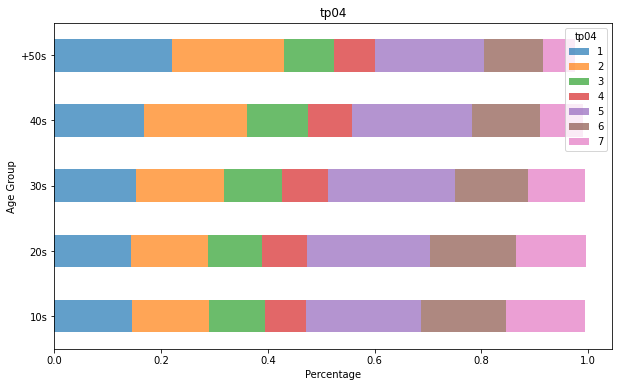

In [ ]:
pivot1.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.7)

plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.title('Anxious, Easily upset')

In [ ]:
pivot2 = pd.pivot_table(data,values='tp04',index='age_group',aggfunc=np.mean)
pivot2

,tp04
age_group,
10s,4.126275
20s,4.107285
30s,3.912455
40s,3.675114
+50s,3.337656


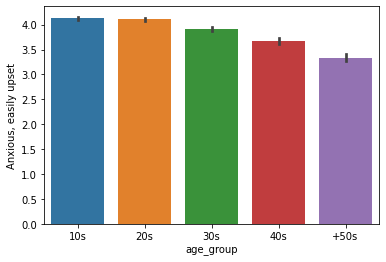

In [ ]:
sns.barplot(x='age_group',y='tp04',data=data,order=column_order)
plt.ylabel('Anxious, easily upset')
plt.show()

*  불안해하는 성격은 10대가 가장 많은 비율로 동의하고 50대 이상이 가장 적은 비율로 동의하는 것을 알 수 있다.
*  50대 이상을 제외한 모든 연령대에서 5번을 선택한 비중이 가장 높았고, 50대 이상은 1번을 선택한 비중이 가장 높은 것을 알 수 있다. 하지만 가장 높게 차지한 비율이 모두 20%대라는 점에서 불안해하는 성격에 대한 응답은 다른 응답들에 비해 골고루 퍼져있다는 것을 알 수 있다. 
*  응답의 평균을 구해보면 연령대가 높아질수록 동의하지 않는 비율이 높아지며, 10대와 50대 이상의 평균 응답은 1점 차이가 난다는 것을 알 수 있다.
*  **연령대가 높아질수록 본인이 불안해하는 성격이라는 것에 동의하지 않는 비율이 높아진다는 것을 알 수 있다.**


## 4.1 환경적 영향


### 4.1.1. 교육수준 (O)

In [ ]:
pivot1 = pd.pivot_table(data = data, index = "education", columns = "tp04", aggfunc = "size", fill_value = 0)
pivot1['Total'] = pivot1.sum(axis=1)
pivot1.loc[0] = pivot1.loc[0]/pivot1['Total'][0]
pivot1.loc[1] = pivot1.loc[1]/pivot1['Total'][1]
pivot1.loc[2] = pivot1.loc[2]/pivot1['Total'][2]
pivot1.loc[3] = pivot1.loc[3]/pivot1['Total'][3]
pivot1.loc[4] = pivot1.loc[4]/pivot1['Total'][4]
pivot1 = pivot1.drop([0], axis=0)
pivot1 = pivot1.drop([0], axis=1)
pivot1 = pivot1.drop(['Total'], axis=1)
pivot1

tp04,1,2,3,4,5,6,7
education,,,,,,,
1,0.130503,0.142099,0.107508,0.080975,0.209709,0.162932,0.158805
2,0.150342,0.148025,0.099436,0.081378,0.223760,0.153312,0.136026
3,0.157286,0.167466,0.106981,0.081566,0.228607,0.146844,0.104617
4,0.179017,0.182964,0.107588,0.080851,0.222562,0.131780,0.087981


Text(0.5, 1.0, 'Anxious, Easily upset')

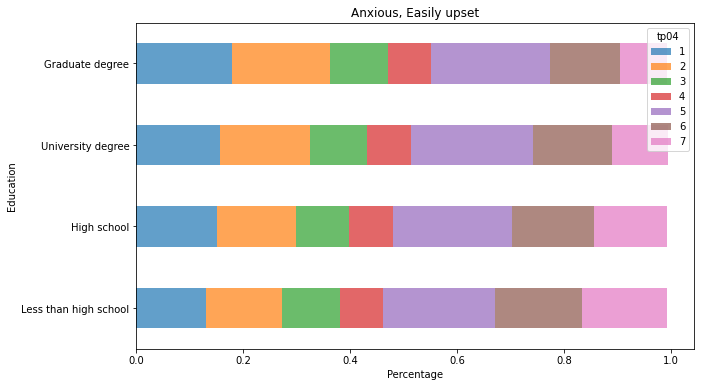

In [ ]:
pivot1.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.7)

plt.xlabel('Percentage')
plt.ylabel('Education')
plt.yticks([0,1,2,3],['Less than high school', 'High school', 'University degree', 'Graduate degree'])
plt.title('Anxious, Easily upset')

In [ ]:
pivot2 = pd.pivot_table(data,values='tp04',index='education',aggfunc=np.mean)
pivot2 = pivot2.drop([0], axis=0)
pivot2

,tp04
education,
1,4.198899
2,4.061063
3,3.895843
4,3.710466


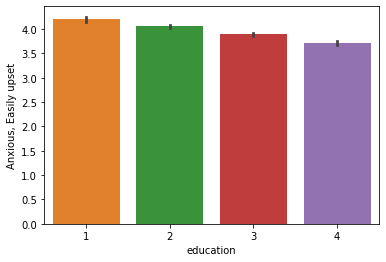

In [ ]:
sns.barplot(x='education',y='tp04',data=data)
plt.xlim([0.5, 4.5]) 
plt.ylabel('Anxious, Easily upset')
plt.show()

*  교육수준에 따라 '신뢰할 수 있는' 성격에 차이가 나타났다. 
*  **교육수준이 높을수록 본인이 불안해하는 성격의 소유자라는 것에 동의하는 비율이 낮은 것으로 나타났다.**

### 4.1.2. 형제 자매수 (△)

In [ ]:
pivot1 = pd.pivot_table(data = data, index = "familysize", columns = "tp04", aggfunc = "size", fill_value = 0)
pivot1['Total'] = pivot1.sum(axis=1)
pivot1.loc[0] = pivot1.loc[0]/pivot1['Total'][0]
pivot1.loc[1] = pivot1.loc[1]/pivot1['Total'][1]
pivot1.loc[2] = pivot1.loc[2]/pivot1['Total'][2]
pivot1.loc[3] = pivot1.loc[3]/pivot1['Total'][3]
pivot1.loc[4] = pivot1.loc[4]/pivot1['Total'][4]
pivot1.loc[5] = pivot1.loc[5]/pivot1['Total'][5]
pivot1.loc[6] = pivot1.loc[6]/pivot1['Total'][6]
pivot1.loc[7] = pivot1.loc[7]/pivot1['Total'][7]
pivot1.loc[8] = pivot1.loc[8]/pivot1['Total'][8]
pivot1.loc[9] = pivot1.loc[9]/pivot1['Total'][9]
pivot1.loc['+10'] = pivot1.loc['+10']/pivot1['Total']['+10']
pivot1 = pivot1.drop([0], axis=1)
pivot1 = pivot1.drop(['Total'], axis=1)
pivot1

tp04,1,2,3,4,5,6,7
familysize,,,,,,,
0,0.141331,0.131471,0.112572,0.101068,0.215283,0.148726,0.141331
1,0.148432,0.148738,0.105432,0.077429,0.230145,0.153022,0.128998
2,0.149682,0.161011,0.106820,0.081929,0.224579,0.151914,0.118205
3,0.154318,0.160892,0.102701,0.080490,0.225036,0.149698,0.119581
4,0.170165,0.168331,0.101488,0.083962,0.214591,0.137966,0.115142
5,0.169215,0.172273,0.102956,0.077472,0.225280,0.134557,0.107034
6,0.204057,0.171838,0.090692,0.089499,0.205251,0.122912,0.101432
7,0.183463,0.160207,0.111111,0.064599,0.217054,0.144703,0.103359
8,0.208145,0.135747,0.063348,0.072398,0.257919,0.126697,0.131222


Text(0.5, 1.0, 'Anxious, Easily upset')

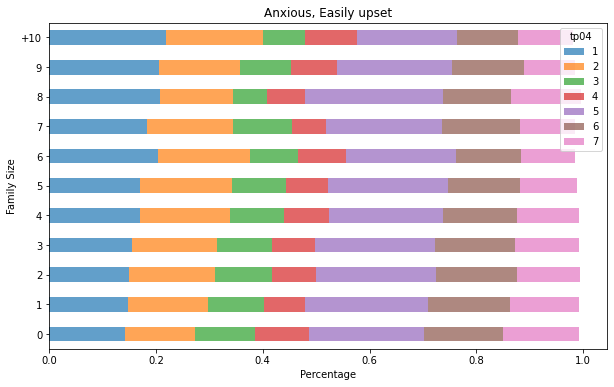

In [ ]:
pivot1.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.7)

plt.xlabel('Percentage')
plt.ylabel('Family Size')
plt.title('Anxious, Easily upset')

In [ ]:
pivot2 = pd.pivot_table(data,values='tp04',index='familysize',aggfunc=np.mean)
pivot2

,tp04
familysize,
0,4.104355
1,4.043764
2,3.981694
3,3.966596
4,3.853882
5,3.815494
6,3.651551
7,3.772610
8,3.927602


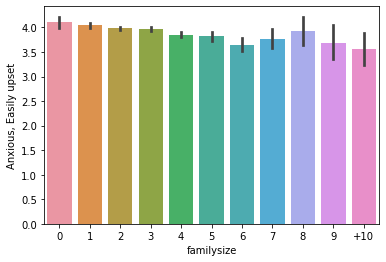

In [ ]:
sns.barplot(x='familysize',y='tp04',data=data)
plt.xlim([-0.5, 10.5]) 
plt.ylabel('Anxious, Easily upset')
plt.show()

*  형제자매 수가 6일 때까지는 불안해하는 성격이라는 것에 동의하는 비율이 낮아지다가 7부터 다시 높아지고 9부터 다시 낮아지는 경향을 확인할 수 있다.
*  **따라서, 형제자매수가 6일 때까지는 형제자매수가 많을수록 불안해하는 성격이라는 것에 동의하는 비율이 낮은 것을 알 수 있다.**


### 4.1.3. 결혼 유무 (O)

In [ ]:
pivot1 = pd.pivot_table(data = data, index = "married", columns = "tp04", aggfunc = "size", fill_value = 0)
pivot1['Total'] = pivot1.sum(axis=1)
pivot1.loc[1] = pivot1.loc[1]/pivot1['Total'][1]
pivot1.loc[2] = pivot1.loc[2]/pivot1['Total'][2]
pivot1.loc[3] = pivot1.loc[3]/pivot1['Total'][3]
pivot1 = pivot1.drop([0], axis=0)
pivot1 = pivot1.drop([0], axis=1)
pivot1 = pivot1.drop(['Total'], axis=1)
pivot1

tp04,1,2,3,4,5,6,7
married,,,,,,,
1,0.144913,0.148748,0.103455,0.082884,0.225452,0.155499,0.133946
2,0.178646,0.188786,0.107764,0.080823,0.217517,0.132220,0.084402
3,0.182507,0.175457,0.103133,0.071279,0.226110,0.130548,0.091645


Text(0.5, 1.0, 'Anxious, Easily upset')

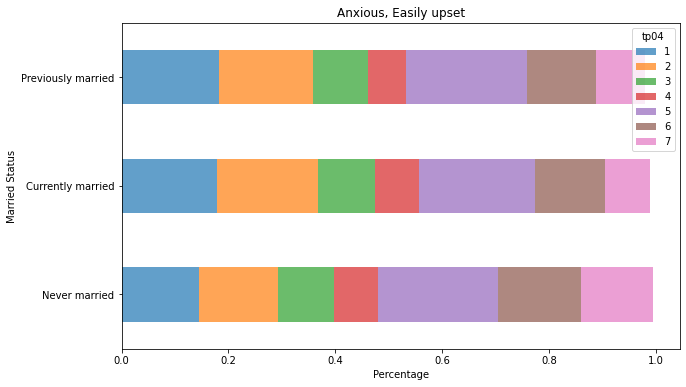

In [ ]:
pivot1.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.7)

plt.xlabel('Percentage')
plt.ylabel('Married Status')
plt.yticks([0,1,2],['Never married','Currently married','Previously married'])
plt.title('Anxious, Easily upset')

In [ ]:
pivot2 = pd.pivot_table(data,values='tp04',index='married',aggfunc=np.mean)
pivot2 = pivot2.drop([0], axis=0)
pivot2

,tp04
married,
1,4.082187
2,3.674520
3,3.683290


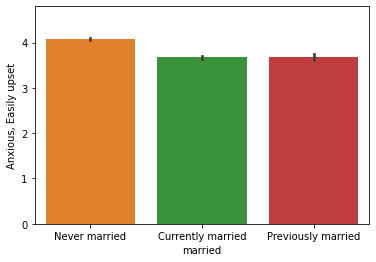

In [ ]:
sns.barplot(x='married',y='tp04',data=data)
plt.xlim([0.5, 3.5]) 
plt.xticks([1,2,3],['Never married','Currently married','Previously married'])
plt.ylabel('Anxious, Easily upset')
plt.show()

*  **한 번이라도 결혼해 본 사람들이 결혼을 한번도 안 해본 사람에 비해 본인이 불안해하는 성격의 소유자라는 것에 동의하지 않는 경향이 나타났다.**
*  현재 결혼한 상태인 사람들과 이혼한 상태인 사람들 사이에서는 차이가 없이 거의 동일한 평균이 나타났다.

### 4.1.4. 유년기 거주지역 (X)

In [ ]:
pivot1 = pd.pivot_table(data = data, index = "urban", columns = "tp04", aggfunc = "size", fill_value = 0)
pivot1['Total'] = pivot1.sum(axis=1)
pivot1.loc[1] = pivot1.loc[1]/pivot1['Total'][1]
pivot1.loc[2] = pivot1.loc[2]/pivot1['Total'][2]
pivot1.loc[3] = pivot1.loc[3]/pivot1['Total'][3]
pivot1 = pivot1.drop([0], axis=0)
pivot1 = pivot1.drop([0], axis=1)
pivot1 = pivot1.drop(['Total'], axis=1)
pivot1

tp04,1,2,3,4,5,6,7
urban,,,,,,,
1,0.161971,0.162420,0.102256,0.082164,0.224717,0.144236,0.114042
2,0.150858,0.161379,0.108719,0.080393,0.226665,0.151182,0.114924
3,0.156864,0.156920,0.101143,0.082344,0.219958,0.147352,0.127090


Text(0.5, 1.0, 'Anxious, Easily upset')

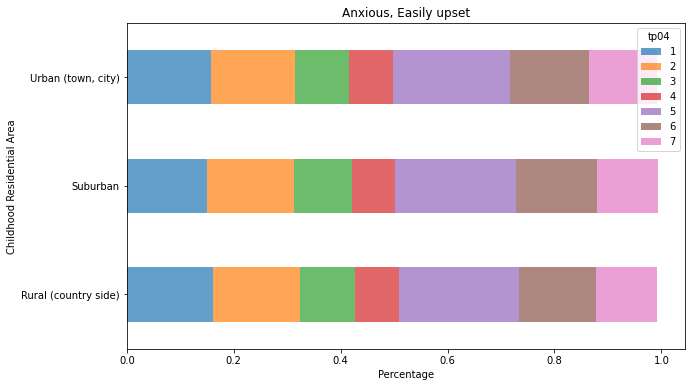

In [ ]:
pivot1.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.7)

plt.xlabel('Percentage')
plt.ylabel('Childhood Residential Area')
plt.yticks([0,1,2],['Rural (country side)', 'Suburban', 'Urban (town, city)'])
plt.title('Anxious, Easily upset')

In [ ]:
pivot2 = pd.pivot_table(data,values='tp04',index='urban',aggfunc=np.mean)
pivot2 = pivot2.drop([0], axis=0)
pivot2

,tp04
urban,
1,3.909530
2,3.966224
3,3.977036


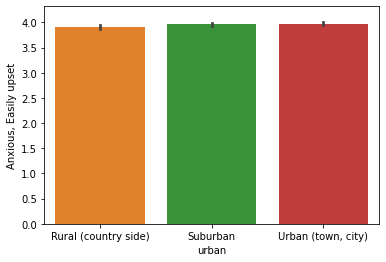

In [ ]:
sns.barplot(x='urban',y='tp04',data=data)
plt.xlim([0.5, 3.5]) 
plt.xticks([1,2,3],['Rural (country side)', 'Suburban', 'Urban (town, city)'])
plt.ylabel('Anxious, Easily upset')
plt.show()

*  유년기 거주 지역은 비율 그래프를 봐도, 평균을 비교해보아도 모두 큰 차이가 나타나지 않는다.
*  따라서, **유년기 거주 지역이 불안해하는 성격인지 여부에 영향을 미치지 않는다고 볼 수 있다.**

### 4.1.5. 모국어가 영어 (X)

In [ ]:
pivot1 = pd.pivot_table(data = data, index = "engnat", columns = "tp04", aggfunc = "size", fill_value = 0)
pivot1['Total'] = pivot1.sum(axis=1)
pivot1.loc[1] = pivot1.loc[1]/pivot1['Total'][1]
pivot1.loc[2] = pivot1.loc[2]/pivot1['Total'][2]
pivot1 = pivot1.drop([0], axis=0)
pivot1 = pivot1.drop([0], axis=1)
pivot1 = pivot1.drop(['Total'], axis=1)
pivot1

tp04,1,2,3,4,5,6,7
engnat,,,,,,,
1,0.156401,0.159672,0.106498,0.079033,0.224625,0.146833,0.119943
2,0.153246,0.160325,0.099027,0.088086,0.221141,0.151959,0.118011


Text(0.5, 1.0, 'Anxious, Easily upset')

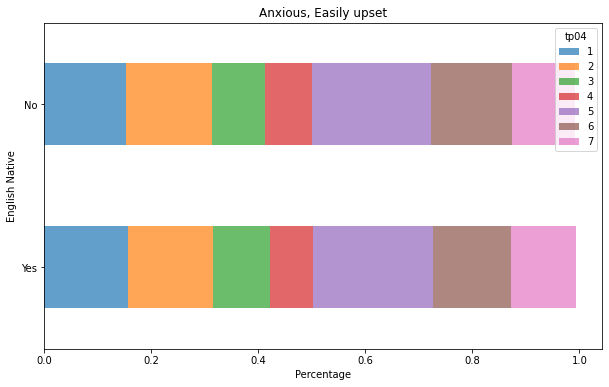

In [ ]:
pivot1.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.7)

plt.xlabel('Percentage')
plt.ylabel('English Native')
plt.yticks([0,1],['Yes', 'No'])
plt.title('Anxious, Easily upset')

In [ ]:
pivot2 = pd.pivot_table(data,values='tp04',index='engnat',aggfunc=np.mean)
pivot2 = pivot2.drop([0], axis=0)
pivot2

,tp04
engnat,
1,3.955093
2,3.966857


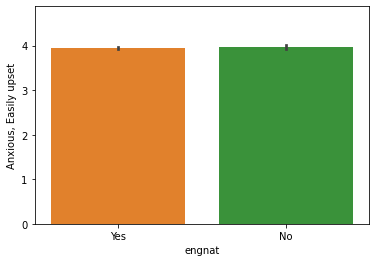

In [ ]:
sns.barplot(x='engnat',y='tp04',data=data)
plt.xlim([0.5, 2.5]) 
plt.xticks([1,2],['Yes', 'No'])
plt.ylabel('Anxious, Easily upset')
plt.show()

*  비율 그래프와 평균을 분석해보았을 때, 모두 영어가 모국어인 사람들이 그렇지 않은 사람들의 응답 차이가 나타나지 않았다.
*  따라서, **모국어가 영어인지 여부는 본인이 불안해하는 성격인지 여부에 영향을 미치지 않는 것으로 나타났다.**

## 4.2 유전적 영향

### 4.2.1. 성별 (O)

In [ ]:
pivot1 = pd.pivot_table(data = data, index = "gender", columns = "tp04", aggfunc = "size", fill_value = 0)
pivot1['Total'] = pivot1.sum(axis=1)
pivot1.loc['Male'] = pivot1.loc['Male']/pivot1['Total']['Male']
pivot1.loc['Female'] = pivot1.loc['Female']/pivot1['Total']['Female']
pivot1 = pivot1.drop([0], axis=1)
pivot1 = pivot1.drop(['Total'], axis=1)
pivot1

tp04,1,2,3,4,5,6,7
gender,,,,,,,
Female,0.100821,0.132489,0.097255,0.079005,0.243350,0.176871,0.162937
Male,0.203535,0.183879,0.110707,0.083660,0.206549,0.123137,0.081100


Text(0.5, 1.0, 'Anxious, Easily upset')

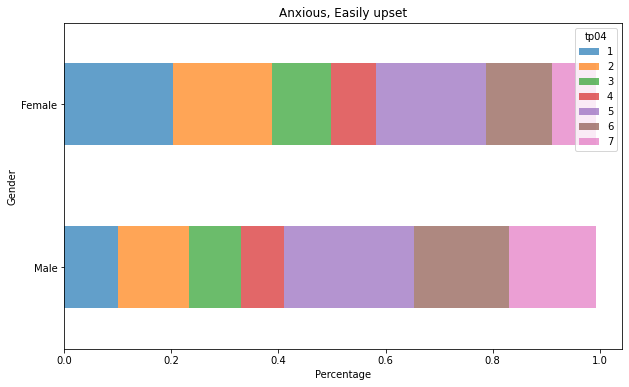

In [ ]:
pivot1.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.7)

plt.xlabel('Percentage')
plt.ylabel('Gender')
plt.yticks([0,1],['Male', 'Female'])
plt.title('Anxious, Easily upset')

In [ ]:
pivot2 = pd.pivot_table(data,values='tp04',index='gender',aggfunc=np.mean)
pivot2

,tp04
gender,
Female,4.392118
Male,3.577322


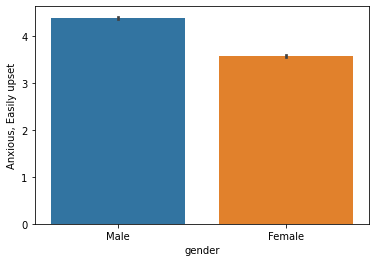

In [ ]:
sns.barplot(x='gender',y='tp04',data=data)
plt.xlim([-0.5, 1.5]) 
plt.xticks([0,1],['Male', 'Female'])
plt.ylabel('Anxious, Easily upset')
plt.show()

*  유전적인 영향인 성별에 따라서 불안해하는 성격인지 여부에 꽤 큰 차이가 나타났다.
*  **평균을 비교해보아도 0.8 정도의 차이가 나타났고, 비율 그래프를 통해 보았을 때에도 남성이 여성에 비해 더 불안해하는 성격에 강력하게 동의하는 것으로 나타났다.**

### 4.2.2. 필기하는 손 (△)

In [ ]:
pivot1 = pd.pivot_table(data = data, index = "hand", columns = "tp04", aggfunc = "size", fill_value = 0)
pivot1['Total'] = pivot1.sum(axis=1)
pivot1.loc[1] = pivot1.loc[1]/pivot1['Total'][1]
pivot1.loc[2] = pivot1.loc[2]/pivot1['Total'][2]
pivot1.loc[3] = pivot1.loc[3]/pivot1['Total'][3]
pivot1 = pivot1.drop([0], axis=0)
pivot1 = pivot1.drop([0], axis=1)
pivot1 = pivot1.drop(['Total'], axis=1)
pivot1

tp04,1,2,3,4,5,6,7
hand,,,,,,,
1,0.152798,0.161529,0.103436,0.080700,0.226176,0.148881,0.118900
2,0.151748,0.153240,0.115729,0.080776,0.216965,0.154945,0.120844
3,0.227637,0.143738,0.094386,0.098088,0.186305,0.115978,0.126465


Text(0.5, 1.0, 'Anxious, Easily upset')

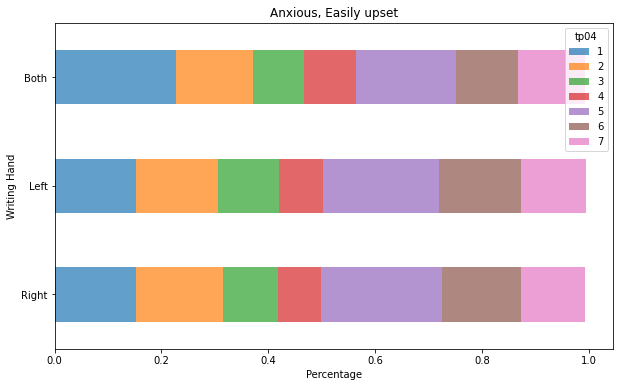

In [ ]:
pivot1.plot(kind='barh', figsize=(10,6), stacked=True, alpha=0.7)

plt.xlabel('Percentage')
plt.ylabel('Writing Hand')
plt.yticks([0,1,2],['Right', 'Left', 'Both'])
plt.title('Anxious, Easily upset')

In [ ]:
pivot2 = pd.pivot_table(data,values='tp04',index='hand',aggfunc=np.mean)
pivot2 = pivot2.drop([0], axis=0)
pivot2

,tp04
hand,
1,3.965436
2,3.988917
3,3.703270


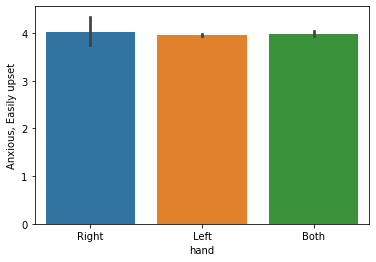

In [ ]:
sns.barplot(x='hand',y='tp04',data=data)
plt.xlim([-0.5, 2.5]) 
plt.xticks([0,1,2],['Right', 'Left', 'Both'])
plt.ylabel('Anxious, Easily upset')
plt.show()

*  **비율 그래프**를 통해 보았을 때에는 필기하는 손에 따라서 **큰 차이가 나타나지 않는 것**을 알 수 있다.
*  **평균**을 비교해보았을 때에는 **양손을 쓰는 사람들이 불안해하는 성격에 동의하는 점수의 평균이 왼손만 혹은 오른손만 쓰는 사람들에 비해 0.2점 낮은 것**을 알 수 있지만, **유의미하게 큰 차이는 아닌 것**으로 판단된다.  

# 결론
*  성격에 영향을 미치는 변수들 중 환경적인 영향의 교육수준과 결혼 유무는 유의미한 차이를 불러일으키는 것으로 판단된다.
*  반면, tp03(신뢰할 수 있는 성격)에서는 유전적 영향인 성별에 따라 차이가 나타나지 않았지만, tp04(불안해하는 성격)에서는 남성이 더 불안해하는 성격이라는 것을 알 수 있었다.
*  어떠한 성격 유형인지에 따라서 다른 변수들이 영향을 끼친다는 것을 알 수 있다.
*  성격은 유전적인 영향도 물론 있지만, 환경적인 영향에 의해 변화할 수도 있다는 것을 파악할 수 있다.

# 추가적인 조사

## 1. 연령대 변화를 선천적 요인으로 봐야할지

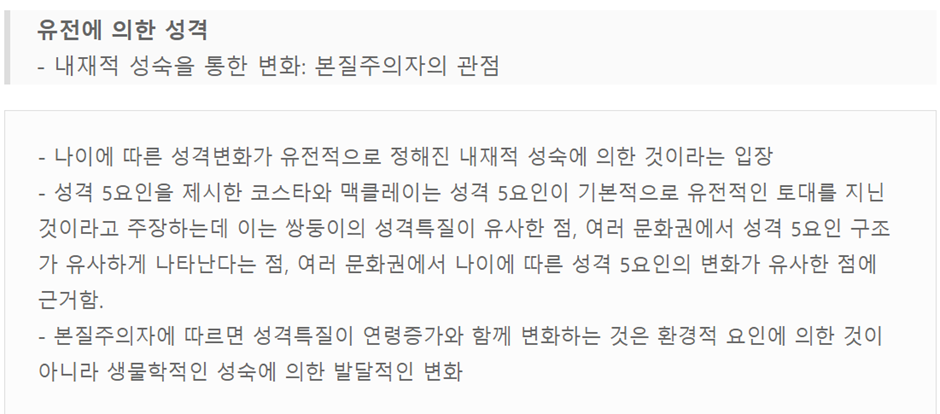

나이는 환경적인 것이 아니라 선천적인 요인으로 쳐야 할 듯. 따라서 연령대에 따라 변화하는 것을 봐서 선천적인 영향도 있었는데, 후천적인 영향을 이와 비교해보고 싶었다. 이런 식으로 도입부?

## 2. 성격이 유전/환경에 의한 것인지 알아보고자 하는 궁극적인 목표가 뚜렷하지 않다고 생각

*  성격과 관련한 가장 큰 논쟁은 성격이 유전적인 것이냐, 환경에 의한 것이냐에 대한 논쟁이다.
*  한국은 경쟁적인 사회이기 때문에 특히 후천적인 것이 강조됨. 선천적인 특성보다 노력이 중요시되는 사회. 정말 후천적인 영향으로 성격을 변화시킬 수 있을까?

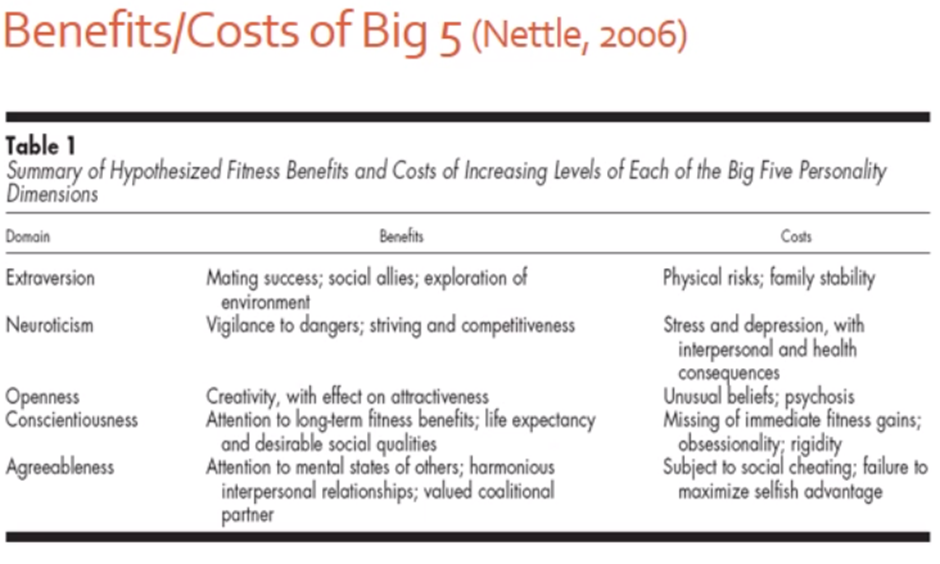

Nettle, D. (2006). **The evolution of personality variation in humans and other animals.** American Psychologist, 61(6), 622–631. https://doi.org/10.1037/0003-066X.61.6.622

*  Big5 성격유형별로 각각 장단점이 존재하는데, 단점을 보완하고 장점을 추구하기 위해서는 성격도 어느 정도 변하는 것이어야 희망적.




논문들: Big5가 영향을 미치는 요인들
*  취업/고용 상태: FRUYT, F. I. L. I. P., & MERVIELDE, I. V. A. N. (1999). **RIASEC types and big five traits as predictors of employment status and nature of employment.** Personnel Psychology, 52(3), 701–727. https://doi.org/10.1111/j.1744-6570.1999.tb00177.x 

* 직업 적성 & 소득, 수입:  Denissen, J. J., Bleidorn, W., Hennecke, M., Luhmann, M., Orth, U., specht, jule, & Zimmermann, J. (2017). **Uncovering the power of personality to shape income.** https://doi.org/10.31219/osf.io/h7c6b 

*  승진 여부: Solomon, B. C., & Jackson, J. J. (2014). **The Long Reach of one’s spouse.** Psychological Science, 25(12), 2189–2198. https://doi.org/10.1177/0956797614551370 

*  이혼율 & 사회적 성취: Roberts, B. W., Kuncel, N. R., Shiner, R., Caspi, A., & Goldberg, L. R. (2007). **The power of personality: The comparative validity of personality traits, socioeconomic status, and cognitive ability for predicting important life outcomes.** Perspectives on Psychological Science, 2(4), 313–345. https://doi.org/10.1111/j.1745-6916.2007.00047.x 



## 3. 기존연구에 따르면 ... 

쌍둥이 연구:

일란성 쌍둥이- 유전자 동일. 입양--> 다른 환경에서 자라남. 이란성 쌍둥이는 유전자를 50%만 공유하고 그냥 같은 날 태 어난 것 뿐, 특별하진 않음. 

결과: 압도적으로 일란성 쌍둥이들이 같은 집안에서 자란 이란성 쌍둥이보다 모든 특성에서 유의미하게 비슷함. 

--> 유전자가 다라는 얘기보단, 우리가 자라나는 환경적 경험보다 선천적, 유전적 특성이 성인이 되었을때 영향을 주는 정도가 강하다. 

유전적인 요인: 오해-변하지 않는다. 하지만! 유전적인 것과 변하지 않는다는 것은 독립적인 이야기! 개인 변화가 within person change면 시간에 따라서 상태 변화. 하지만 애당초 높고 낮은 사람의 순위가 뒤바뀔 정도로 장기적으로 바꾸는 것은 쉽지 않을 수 있다.
